In [52]:
import numpy as np
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

import pickle


In [60]:
df = pd.read_csv('df_ms.csv')
pd.set_option('display.max_rows', None) #In order to view all rows
pd.set_option('display.max_columns', None) #In order to view all columns
df = df.drop('Unnamed: 0',axis=1) #Removing weird column
df

,fips_code,state,name,poor_or_fair_health,monthly_poor_physical_health_days,monthly_poor_mental_health_days,adult_smoking,adult_obesity,physical_inactivity,access_to_exercise,excessive_drinking,alcohol_impaired_driving_deaths,uninsured_under_65,primary_care_physicians,dentists,mental_health_providers,flu_vaccinations,high_school_grad,some_college,unemployed,children_in_poverty,single_parent_households,social_associations,violent_crime,injury_deaths,severe_housing_problems,households_with_high_housing_costs,households_with_overcrowding,households_with_lack_of_kitchen_or_plumbing_facilities,life_expectancy,diabetes_prevalence,hiv_prevalence,limited_access_to_healthy_foods,drug_overdose_deaths,motor_vehicle_crash_deaths,uninsured_adults,uninsured_children,other_primary_care_providers,median_household_income,children_eligible_for_free_or_reduced_price_lunch,homicides,firearm_fatalities,homeownership,severe_housing_cost_burden,population,proficient_in_English
0,28000,MS,Mississippi,0.222107,4.374736,4.420219,0.227407,0.365,0.313,0.554734,0.136770,0.212279,0.139798,0.000528,0.000467,0.001425,0.39,0.832546,0.590328,0.050746,0.276,0.442149,12.557190,279.484289,84.974059,0.162740,0.114276,0.024134,0.012604,74.810028,0.141,374.0,0.106594,11.790086,23.525043,0.178396,0.046922,0.001016,43595.0,0.749865,10.7,19.3,0.681141,0.135481,2984100.0,0.007951
1,28001,MS,Adams County,0.252348,4.294514,4.335378,0.228640,0.378,0.309,0.690776,0.125201,0.307692,0.140841,0.000832,0.000452,0.000710,0.44,0.800000,0.440741,0.072914,0.444,0.614898,14.720942,303.722955,96.610988,0.144243,0.123934,0.029945,0.004639,74.451844,0.145,384.4,0.133368,11.764077,17.605554,0.178952,0.042348,0.001097,31044.0,1.000000,15.3,23.5,0.624642,0.154241,31003.0,0.066914
2,28003,MS,Alcorn County,0.206829,4.240856,4.409242,0.191566,0.360,0.348,0.278760,0.135918,0.153846,0.141820,0.000295,0.000484,0.002741,0.42,0.878178,0.583857,0.043989,0.252,0.290999,13.135321,0.000000,98.071791,0.150287,0.109829,0.026005,0.016886,73.324604,0.137,125.5,0.046792,15.191864,24.155145,0.179983,0.048239,0.001397,39528.0,0.617115,9.6,21.4,0.702078,0.090489,37210.0,0.008827
3,28005,MS,Amite County,0.233394,4.445175,4.371345,0.206888,0.413,0.341,0.407814,0.113224,0.307692,0.172025,0.000161,0.000241,0.000080,0.20,0.882537,0.433731,0.066534,0.316,0.343927,16.856638,0.000000,93.640389,0.114343,0.093686,0.014042,0.011033,76.330296,0.163,187.6,0.089350,3.212149,32.574022,0.210159,0.069196,0.000562,35422.0,1.000000,12.4,15.9,0.858430,0.093969,12447.0,0.001432
4,28007,MS,Attala County,0.223945,4.211989,4.115317,0.187388,0.395,0.336,0.339297,0.121838,0.083333,0.138016,0.000475,0.000325,0.000271,0.47,0.825000,0.537795,0.061401,0.318,0.441490,14.260061,0.000000,95.856068,0.162416,0.120490,0.033557,0.013423,71.916088,0.170,205.7,0.115136,3.212149,30.698503,0.180006,0.046773,0.000595,35158.0,0.756901,10.5,20.0,0.705464,0.124242,18477.0,0.001546
5,28009,MS,Benton County,0.226610,4.264957,4.316117,0.203010,0.360,0.315,0.772139,0.124410,0.176471,0.147830,0.000549,0.000241,0.000361,0.41,0.775000,0.361530,0.055337,0.339,0.327362,9.680542,0.000000,108.108108,0.138280,0.127179,0.021922,0.004722,71.978073,0.148,216.9,0.215502,3.212149,44.002911,0.184426,0.048413,0.000481,35797.0,0.848069,0.7,1.7,0.827365,0.085991,8312.0,0.007259
6,28011,MS,Bolivar County,0.288365,4.992674,4.647935,0.230074,0.392,0.320,0.492810,0.107646,0.230769,0.140890,0.000519,0.000407,0.000532,0.37,0.822168,0.577382,0.064536,0.415,0.653133,15.884168,0.000000,82.016150,0.197496,0.161488,0.036753,0.007189,71.874095,0.152,448.0,0.243516,3.212149,28.266009,0.180809,0.049751,0.000939,34216.0,0.922228,17.6,25.9,0.554333,0.199947,31945.0,0.003800
7,28013,MS,Calhoun County,0.250819,4.419920,4.329968,0.205913,0.390,0.372,0.626654,0.120049,0.176471,0.189265,0.000137,0.000207,0.000069,0.42,0.875000,0.437704,0.043067,0.304,0.425575,16.427105,0.000000,91.407678,0.128378,0.108562,0.027027,0.004054,74.385560,0.187,140.2,0.042794,3.212149,32.020804,0.240497,0.067220,0.0

In [61]:
df.describe()

,fips_code,poor_or_fair_health,monthly_poor_physical_health_days,monthly_poor_mental_health_days,adult_smoking,adult_obesity,physical_inactivity,access_to_exercise,excessive_drinking,alcohol_impaired_driving_deaths,uninsured_under_65,primary_care_physicians,dentists,mental_health_providers,flu_vaccinations,high_school_grad,some_college,unemployed,children_in_poverty,single_parent_households,social_associations,violent_crime,injury_deaths,severe_housing_problems,households_with_high_housing_costs,households_with_overcrowding,households_with_lack_of_kitchen_or_plumbing_facilities,life_expectancy,diabetes_prevalence,hiv_prevalence,limited_access_to_healthy_foods,drug_overdose_deaths,motor_vehicle_crash_deaths,uninsured_adults,uninsured_children,other_primary_care_providers,median_household_income,children_eligible_for_free_or_reduced_price_lunch,homicides,firearm_fatalities,homeownership,severe_housing_cost_burden,population,proficient_in_English
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,8.300000e+01,83.000000
mean,28081.012048,0.235075,4.325070,4.262161,0.207271,0.379530,0.328723,0.429003,0.127037,0.214142,0.150256,0.000405,0.000339,0.001045,0.362892,0.829540,0.525864,0.059753,0.325578,0.462316,12.910761,97.867442,93.486570,0.160293,0.130315,0.030124,0.010842,74.087409,0.151096,296.243373,0.108352,7.285663,29.439438,0.191554,0.050407,0.000804,38726.060241,0.815362,9.350602,17.566265,0.707702,0.131993,7.190602e+04,0.006237
std,48.187260,0.047284,0.477247,0.294330,0.024227,0.035235,0.032471,0.225734,0.018352,0.129431,0.019111,0.000253,0.000180,0.001205,0.092163,0.046589,0.100729,0.018041,0.103992,0.130458,3.586878,159.511203,22.091984,0.034425,0.035207,0.012320,0.006897,1.893595,0.018715,201.701840,0.073720,6.870100,10.285407,0.024730,0.008016,0.000438,8649.330991,0.151563,8.066392,9.206139,0.099372,0.037420,3.264059e+05,0.009484
min,28000.000000,0.146538,3.316584,3.392336,0.150740,0.306000,0.236000,0.000000,0.094077,0.000000,0.095436,0.000000,0.000000,0.000069,0.150000,0.720000,0.260504,0.035662,0.119000,0.228222,2.740852,0.000000,25.590719,0.097264,0.074336,0.009869,0.000984,70.155742,0.101000,10.400000,0.000000,3.212149,2.806817,0.117309,0.034087,0.000000,24783.000000,0.466016,0.700000,1.700000,0.375094,0.067763,1.339000e+03,0.000000
25%,28040.000000,0.201543,4.031532,4.074021,0.190828,0.357000,0.313500,0.271715,0.114666,0.134848,0.139049,0.000217,0.000222,0.000224,0.290000,0.803695,0.451449,0.048336,0.246500,0.347443,10.245351,0.000000,79.425702,0.136052,0.103811,0.022045,0.006107,72.624202,0.141500,172.700000,0.058579,3.212149,22.908193,0.178775,0.045412,0.000529,32788.000000,0.707598,0.700000,14.150000,0.655668,0.105293,1.299400e+04,0.001167
50%,28081.000000,0.226610,4.271664,4.279764,0.203010,0.373000,0.329000,0.430928,0.125201,0.200000,0.149954,0.000378,0.000307,0.000512,0.370000,0.828031,0.532346,0.055311,0.316000,0.445263,12.762789,0.000000,93.192222,0.157921,0.127179,0.027027,0.009195,74.120591,0.150000,257.100000,0.088806,3.212149,28.448014,0.190511,0.049626,0.000748,38385.000000,0.805451,7.900000,17.700000,0.725946,0.128691,2.315400e+04,0.003684
75%,28122.000000,0.260640,4.605437,4.418529,0.218187,0.402000,0.348500,0.612525,0.136678,0.283817,0.158866,0.000520,0.000409,0.001517,0.430000,0.875000,0.581700,0.067571,0.377500,0.560506,14.902867,167.986339,105.802076,0.179833,0.148818,0.035401,0.013869,75.235287,0.163500,386.100000,0.140801,10.670969,37.066382,0.204190,0.055880,0.000994,43027.500000,0.992458,14.700000,22.550000,0.765487,0.156461,3.654100e+04,0.007948
max,28163.000000,0.360108,5.622736,5.122680,0.271309,0.495000,0.398000,0.881189,0

In [71]:
df.life_expectancy.sort_values()

50    70.155742
72    70.815008
60    70.881287
79    70.915209
14    71.321585
26    71.488448
67    71.519012
42    71.535933
63    71.761942
76    71.793772
6     71.874095
4     71.916088
5     71.978073
20    72.046644
32    72.103395
57    72.235237
46    72.249405
12    72.333353
39    72.494352
71    72.612493
11    72.624196
70    72.624207
54    72.674030
16    72.684384
22    72.758046
82    72.789913
33    72.911447
75    73.090604
81    73.169995
43    73.177234
2     73.324604
51    73.508473
62    73.546519
52    73.654068
78    73.690212
49    73.731423
21    73.748371
15    73.884214
66    73.986043
47    74.054254
59    74.092928
27    74.120591
55    74.350233
34    74.355641
7     74.385560
18    74.414171
64    74.441927
1     74.451844
68    74.452503
80    74.631435
41    74.670495
9     74.767725
29    74.781666
0     74.810028
13    74.857743
69    74.927388
10    74.986425
77    75.081441
24    75.092930
19    75.173351
38    75.176077
31    75.180656
25    75

In [79]:
df_ms_1 = df.loc[(df['fips_code'] == 28099)] 
df_ms_2 = df.loc[(df['fips_code'] == 28143)] 
df_ms_3 = df.loc[(df['fips_code'] == 28119)] 
#Accessing the 3 counties with the lowest life expectancy

In [80]:
df_ms_1

,fips_code,state,name,poor_or_fair_health,monthly_poor_physical_health_days,monthly_poor_mental_health_days,adult_smoking,adult_obesity,physical_inactivity,access_to_exercise,excessive_drinking,alcohol_impaired_driving_deaths,uninsured_under_65,primary_care_physicians,dentists,mental_health_providers,flu_vaccinations,high_school_grad,some_college,unemployed,children_in_poverty,single_parent_households,social_associations,violent_crime,injury_deaths,severe_housing_problems,households_with_high_housing_costs,households_with_overcrowding,households_with_lack_of_kitchen_or_plumbing_facilities,life_expectancy,diabetes_prevalence,hiv_prevalence,limited_access_to_healthy_foods,drug_overdose_deaths,motor_vehicle_crash_deaths,uninsured_adults,uninsured_children,other_primary_care_providers,median_household_income,children_eligible_for_free_or_reduced_price_lunch,homicides,firearm_fatalities,homeownership,severe_housing_cost_burden,population,proficient_in_English
50,28099,MS,Neshoba County,0.24843,4.699476,4.649394,0.216942,0.394,0.331,0.451409,0.128953,0.2,0.173226,0.000578,0.000579,0.000715,0.23,0.803865,0.524791,0.050775,0.31,0.52412,13.604054,0.0,116.84227,0.158287,0.107143,0.052607,0.007914,70.155742,0.143,196.4,0.037923,13.600045,37.715778,0.233105,0.056103,0.00109,38728.0,0.746117,10.6,27.2,0.734893,0.109977,29369.0,0.007923


In [81]:
df_ms_2

,fips_code,state,name,poor_or_fair_health,monthly_poor_physical_health_days,monthly_poor_mental_health_days,adult_smoking,adult_obesity,physical_inactivity,access_to_exercise,excessive_drinking,alcohol_impaired_driving_deaths,uninsured_under_65,primary_care_physicians,dentists,mental_health_providers,flu_vaccinations,high_school_grad,some_college,unemployed,children_in_poverty,single_parent_households,social_associations,violent_crime,injury_deaths,severe_housing_problems,households_with_high_housing_costs,households_with_overcrowding,households_with_lack_of_kitchen_or_plumbing_facilities,life_expectancy,diabetes_prevalence,hiv_prevalence,limited_access_to_healthy_foods,drug_overdose_deaths,motor_vehicle_crash_deaths,uninsured_adults,uninsured_children,other_primary_care_providers,median_household_income,children_eligible_for_free_or_reduced_price_lunch,homicides,firearm_fatalities,homeownership,severe_housing_cost_burden,population,proficient_in_English
72,28143,MS,Tunica County,0.272366,4.603902,4.263273,0.222389,0.407,0.331,0.562071,0.114528,0.307692,0.115224,0.000098,0.000457,0.000299,0.36,0.875,0.585142,0.058081,0.446,0.715124,7.81708,429.205247,73.417183,0.249373,0.17762,0.081454,0.008772,70.815008,0.147,805.7,0.096319,3.212149,17.841948,0.155619,0.034087,0.000599,31492.0,1.0,19.2,1.7,0.375094,0.212385,10024.0,0.009949


In [82]:
df_ms_3

,fips_code,state,name,poor_or_fair_health,monthly_poor_physical_health_days,monthly_poor_mental_health_days,adult_smoking,adult_obesity,physical_inactivity,access_to_exercise,excessive_drinking,alcohol_impaired_driving_deaths,uninsured_under_65,primary_care_physicians,dentists,mental_health_providers,flu_vaccinations,high_school_grad,some_college,unemployed,children_in_poverty,single_parent_households,social_associations,violent_crime,injury_deaths,severe_housing_problems,households_with_high_housing_costs,households_with_overcrowding,households_with_lack_of_kitchen_or_plumbing_facilities,life_expectancy,diabetes_prevalence,hiv_prevalence,limited_access_to_healthy_foods,drug_overdose_deaths,motor_vehicle_crash_deaths,uninsured_adults,uninsured_children,other_primary_care_providers,median_household_income,children_eligible_for_free_or_reduced_price_lunch,homicides,firearm_fatalities,homeownership,severe_housing_cost_burden,population,proficient_in_English
60,28119,MS,Quitman County,0.346461,5.375611,4.824687,0.260783,0.411,0.382,0.173781,0.09568,0.307692,0.164686,0.000136,0.000138,0.000413,0.38,0.825,0.401705,0.087324,0.575,0.623789,12.246564,0.0,133.031795,0.181669,0.158249,0.03437,0.004583,70.881287,0.163,466.3,0.236305,3.212149,41.108433,0.214771,0.04185,0.000825,26740.0,1.0,18.7,1.7,0.655273,0.165693,7269.0,0.007944


In [86]:
df_ms_l3c = pd.concat([df_ms_1, df_ms_2, df_ms_3], ignore_index=True)
df_ms_l3c

,fips_code,state,name,poor_or_fair_health,monthly_poor_physical_health_days,monthly_poor_mental_health_days,adult_smoking,adult_obesity,physical_inactivity,access_to_exercise,excessive_drinking,alcohol_impaired_driving_deaths,uninsured_under_65,primary_care_physicians,dentists,mental_health_providers,flu_vaccinations,high_school_grad,some_college,unemployed,children_in_poverty,single_parent_households,social_associations,violent_crime,injury_deaths,severe_housing_problems,households_with_high_housing_costs,households_with_overcrowding,households_with_lack_of_kitchen_or_plumbing_facilities,life_expectancy,diabetes_prevalence,hiv_prevalence,limited_access_to_healthy_foods,drug_overdose_deaths,motor_vehicle_crash_deaths,uninsured_adults,uninsured_children,other_primary_care_providers,median_household_income,children_eligible_for_free_or_reduced_price_lunch,homicides,firearm_fatalities,homeownership,severe_housing_cost_burden,population,proficient_in_English
0,28099,MS,Neshoba County,0.248430,4.699476,4.649394,0.216942,0.394,0.331,0.451409,0.128953,0.200000,0.173226,0.000578,0.000579,0.000715,0.23,0.803865,0.524791,0.050775,0.310,0.524120,13.604054,0.000000,116.842270,0.158287,0.107143,0.052607,0.007914,70.155742,0.143,196.4,0.037923,13.600045,37.715778,0.233105,0.056103,0.001090,38728.0,0.746117,10.6,27.2,0.734893,0.109977,29369.0,0.007923
1,28143,MS,Tunica County,0.272366,4.603902,4.263273,0.222389,0.407,0.331,0.562071,0.114528,0.307692,0.115224,0.000098,0.000457,0.000299,0.36,0.875000,0.585142,0.058081,0.446,0.715124,7.817080,429.205247,73.417183,0.249373,0.177620,0.081454,0.008772,70.815008,0.147,805.7,0.096319,3.212149,17.841948,0.155619,0.034087,0.000599,31492.0,1.000000,19.2,1.7,0.375094,0.212385,10024.0,0.009949
2,28119,MS,Quitman County,0.346461,5.375611,4.824687,0.260783,0.411,0.382,0.173781,0.095680,0.307692,0.164686,0.000136,0.000138,0.000413,0.38,0.825000,0.401705,0.087324,0.575,0.623789,12.246564,0.000000,133.031795,0.181669,0.158249,0.034370,0.004583,70.881287,0.163,466.3,0.236305,3.212149,41.108433,0.214771,0.041850,0.000825,26740.0,1.000000,18.7,1.7,0.655273,0.165693,7269.0,0.007944


In [92]:
df_ms_l3c.describe()

,fips_code,poor_or_fair_health,monthly_poor_physical_health_days,monthly_poor_mental_health_days,adult_smoking,adult_obesity,physical_inactivity,access_to_exercise,excessive_drinking,alcohol_impaired_driving_deaths,uninsured_under_65,primary_care_physicians,dentists,mental_health_providers,flu_vaccinations,high_school_grad,some_college,unemployed,children_in_poverty,single_parent_households,social_associations,violent_crime,injury_deaths,severe_housing_problems,households_with_high_housing_costs,households_with_overcrowding,households_with_lack_of_kitchen_or_plumbing_facilities,life_expectancy,diabetes_prevalence,hiv_prevalence,limited_access_to_healthy_foods,drug_overdose_deaths,motor_vehicle_crash_deaths,uninsured_adults,uninsured_children,other_primary_care_providers,median_household_income,children_eligible_for_free_or_reduced_price_lunch,homicides,firearm_fatalities,homeownership,severe_housing_cost_burden,population,proficient_in_English
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,28120.333333,0.289086,4.892996,4.579118,0.233371,0.404000,0.348000,0.395753,0.113054,0.271795,0.151045,0.000271,0.000391,0.000476,0.323333,0.834622,0.503879,0.065394,0.443667,0.621011,11.222566,143.068416,107.763749,0.196443,0.147671,0.056144,0.007090,70.617346,0.151000,489.466667,0.123516,6.674781,32.222053,0.201165,0.044013,0.000838,32320.000000,0.915372,16.166667,10.200000,0.588420,0.162685,15554.000000,0.008605
std,22.030282,0.051110,0.420679,0.287229,0.023895,0.008888,0.029445,0.200039,0.016685,0.062176,0.031315,0.000267,0.000228,0.000215,0.081445,0.036530,0.093490,0.019340,0.132515,0.095532,3.026334,247.801765,30.826776,0.047306,0.036410,0.023740,0.002213,0.401132,0.010583,305.309914,0.101949,5.997455,12.568536,0.040495,0.011166,0.000246,6036.739517,0.146579,4.827353,14.722432,0.188986,0.051270,12043.179605,0.001163
min,28099.000000,0.248430,4.603902,4.263273,0.216942,0.394000,0.331000,0.173781,0.095680,0.200000,0.115224,0.000098,0.000138,0.000299,0.230000,0.803865,0.401705,0.050775,0.310000,0.524120,7.817080,0.000000,73.417183,0.158287,0.107143,0.034370,0.004583,70.155742,0.143000,196.400000,0.037923,3.212149,17.841948,0.155619,0.034087,0.000599,26740.000000,0.746117,10.600000,1.700000,0.375094,0.109977,7269.000000,0.007923
25%,28109.000000,0.260398,4.651689,4.456333,0.219665,0.400500,0.331000,0.312595,0.105104,0.253846,0.139955,0.000117,0.000297,0.000356,0.295000,0.814433,0.463248,0.054428,0.378000,0.573954,10.031822,0.000000,95.129727,0.169978,0.132696,0.043488,0.006248,70.485375,0.145000,331.350000,0.067121,3.212149,27.778863,0.185195,0.037969,0.000712,29116.000000,0.873059,14.650000,1.700000,0.515184,0.137835,8646.500000,0.007934
50%,28119.000000,0.272366,4.699476,4.649394,0.222389,0.407000,0.331000,0.451409,0.114528,0.307692,0.164686,0.000136,0.000457,0.000413,0.360000,0.825000,0.524791,0.058081,0.446000,0.623789,12.246564,0.000000,116.842270,0.181669,0.158249,0.052607,0.007914,70.815008,0.147000,466.300000,0.096319,3.212149,37.715778,0.214771,0.041850,0.000825,31492.000000,1.000000,18.700000,1.700000,0.655273,0.165693,10024.000000,0.007944
75%,28131.000000,0.309414,5.037543,4.737040,0.241586,0.409000,0.356500,0.506740,0.121741,0.307692,0.168956,0.000357,0.000518,0.000564,0.370000,0.850000,0.554967,0.072703,0.510500,0.669456,12.925309,214.602623,124.937032,0.215521,0.167935,0.067030,0.008343,70.848148,0.155000,636.000000,0.166312,8.406097,39.412105,0.223938,0.048977,0.000958,35110.000000,1.000000,18.950000,14.450000,0.695083,0.189039,19696.500000,0.008947
max,28143.000000,0.346461,5.375611,4.824687,0.260783,0.411000,0.382000,0.562071,0.128953,0.307692,0.173226,0.000578,0.00057

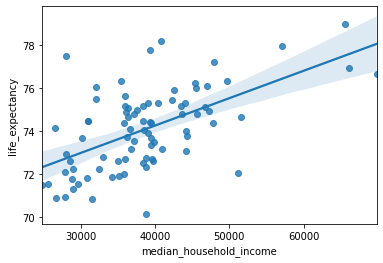

In [90]:
sns.regplot(x='median_household_income', y='life_expectancy', data=df)

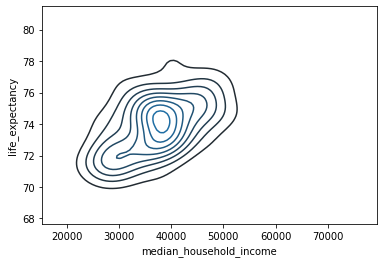

In [31]:
sns.kdeplot(df.median_household_income, df.life_expectancy)

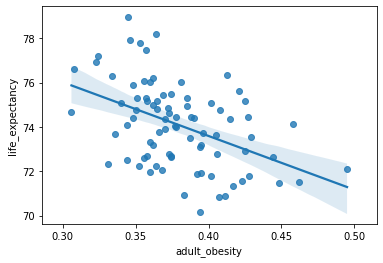

In [89]:
sns.regplot(x='adult_obesity', y='life_expectancy', data=df)

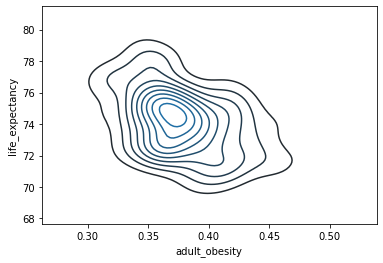

In [37]:
sns.kdeplot(df.adult_obesity, df.life_expectancy)

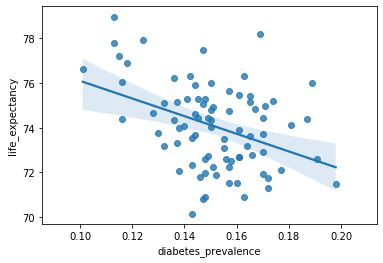

In [24]:
sns.regplot(x='diabetes_prevalence', y='life_expectancy', data=df)

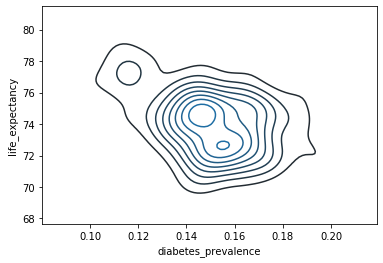

In [32]:
sns.kdeplot(df.diabetes_prevalence, df.life_expectancy)

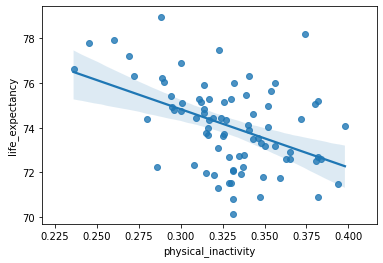

In [26]:
sns.regplot(x='physical_inactivity', y='life_expectancy', data=df)

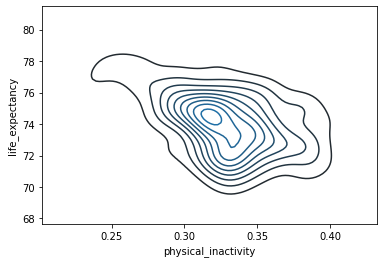

In [33]:
sns.kdeplot(df.physical_inactivity, df.life_expectancy)

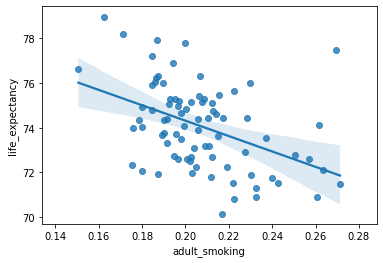

In [27]:
sns.regplot(x='adult_smoking', y='life_expectancy', data=df)

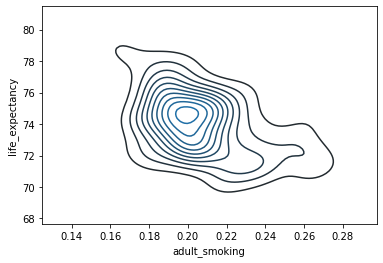

In [34]:
sns.kdeplot(df.adult_smoking, df.life_expectancy)

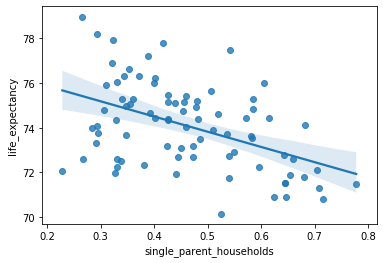

In [36]:
sns.regplot(x='single_parent_households', y='life_expectancy', data=df)

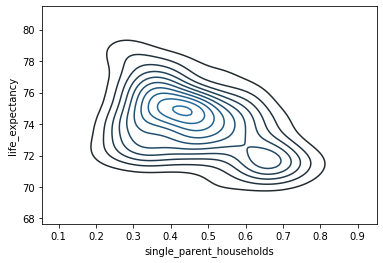

In [29]:
sns.kdeplot(df.single_parent_households, df.life_expectancy)

In [102]:
health_features = ['adult_smoking', 'adult_obesity', 'physical_inactivity',
            'excessive_drinking', 'uninsured_under_65',
            'primary_care_physicians', 'dentists', 'mental_health_providers', 'flu_vaccinations', 
            'unemployed', 'diabetes_prevalence', 'hiv_prevalence', 
            'limited_access_to_healthy_foods', 
            'uninsured_adults', 'uninsured_children', 'other_primary_care_providers',
            'median_household_income']
df_health_features = df[health_features]

social_features = ['poor_or_fair_health', 
            'monthly_poor_physical_health_days', 'monthly_poor_mental_health_days', 
            'access_to_exercise',
            'alcohol_impaired_driving_deaths', 
            'high_school_grad', 'some_college', 'unemployed', 'children_in_poverty', 
            'single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 
            'severe_housing_problems', 'households_with_high_housing_costs', 
            'households_with_overcrowding', 'households_with_lack_of_kitchen_or_plumbing_facilities',
            'drug_overdose_deaths', 'motor_vehicle_crash_deaths', 
            'median_household_income', 'children_eligible_for_free_or_reduced_price_lunch',
            'homicides', 'firearm_fatalities', 'homeownership', 'severe_housing_cost_burden', 
            'population', 'proficient_in_English']
df_social_features = df[social_features]

target = df['life_expectancy']

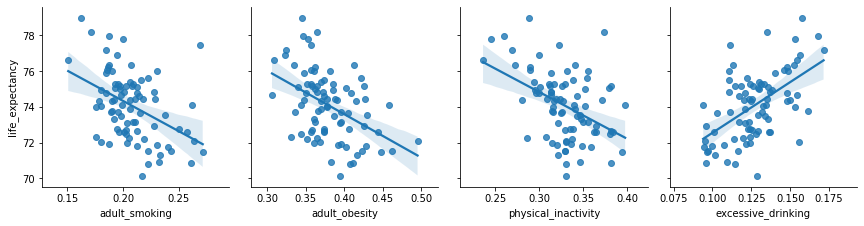

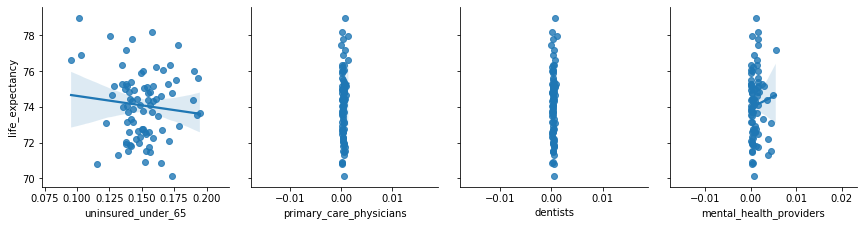

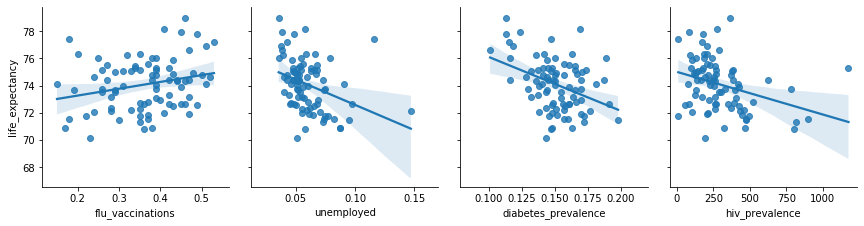

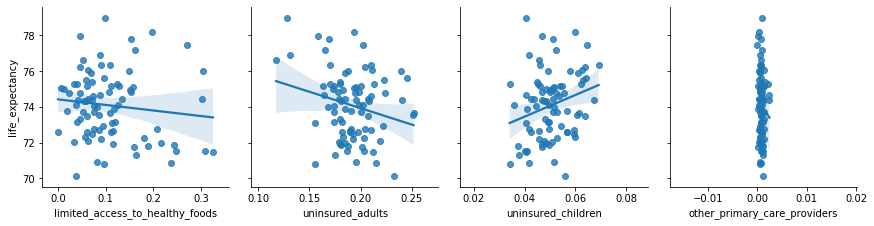

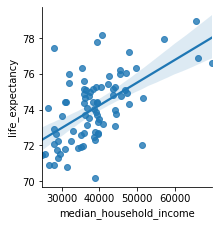

In [99]:
#Distribute columns into groups of 4 per row
n = 4
row_groups = [health_features[i:i+n] for i in range(0, len(health_features), n)]
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['life_expectancy'],x_vars=i, kind="reg", height=3)

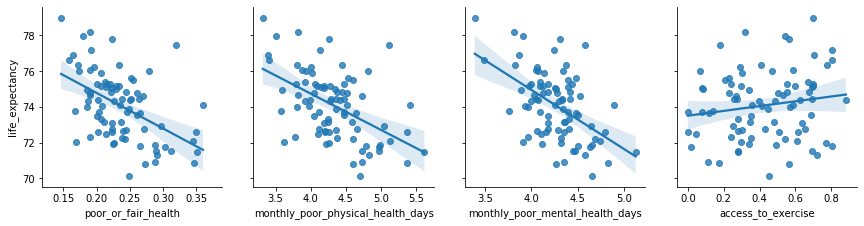

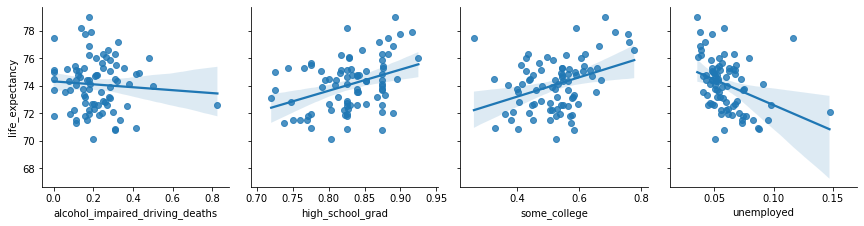

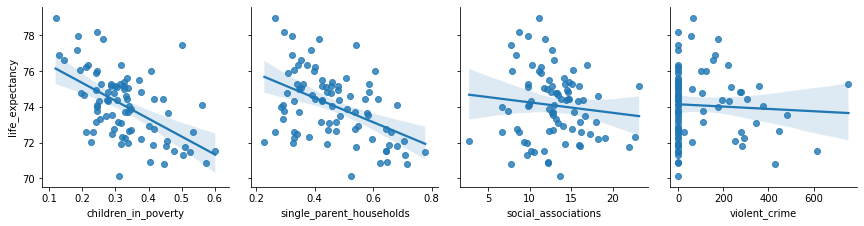

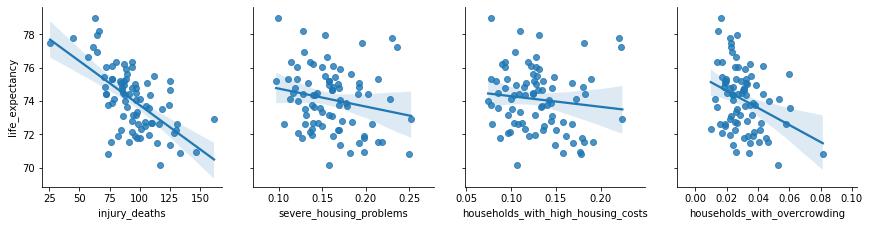

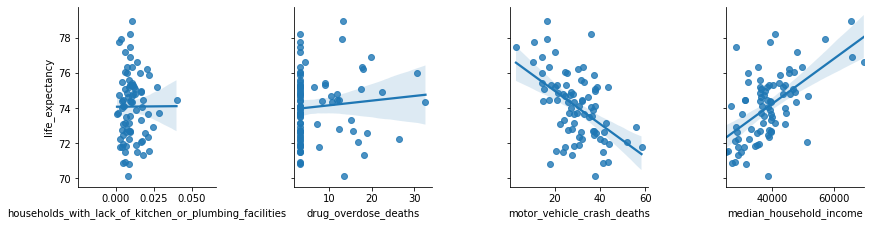

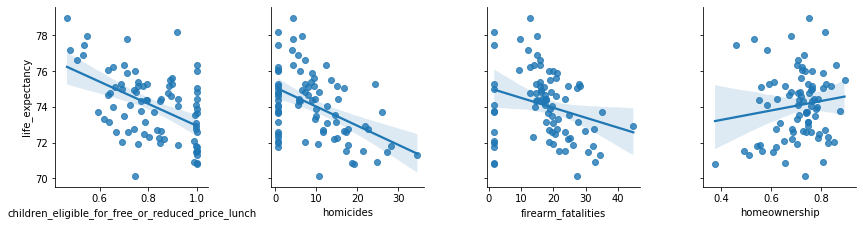

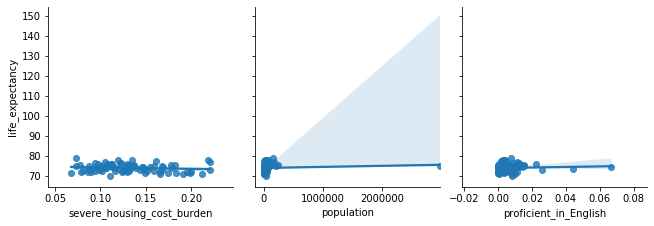

In [100]:
#Distribute columns into groups of 4 per row
n = 4
row_groups = [social_features[i:i+n] for i in range(0, len(social_features), n)]
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['life_expectancy'],x_vars=i, kind="reg", height=3)

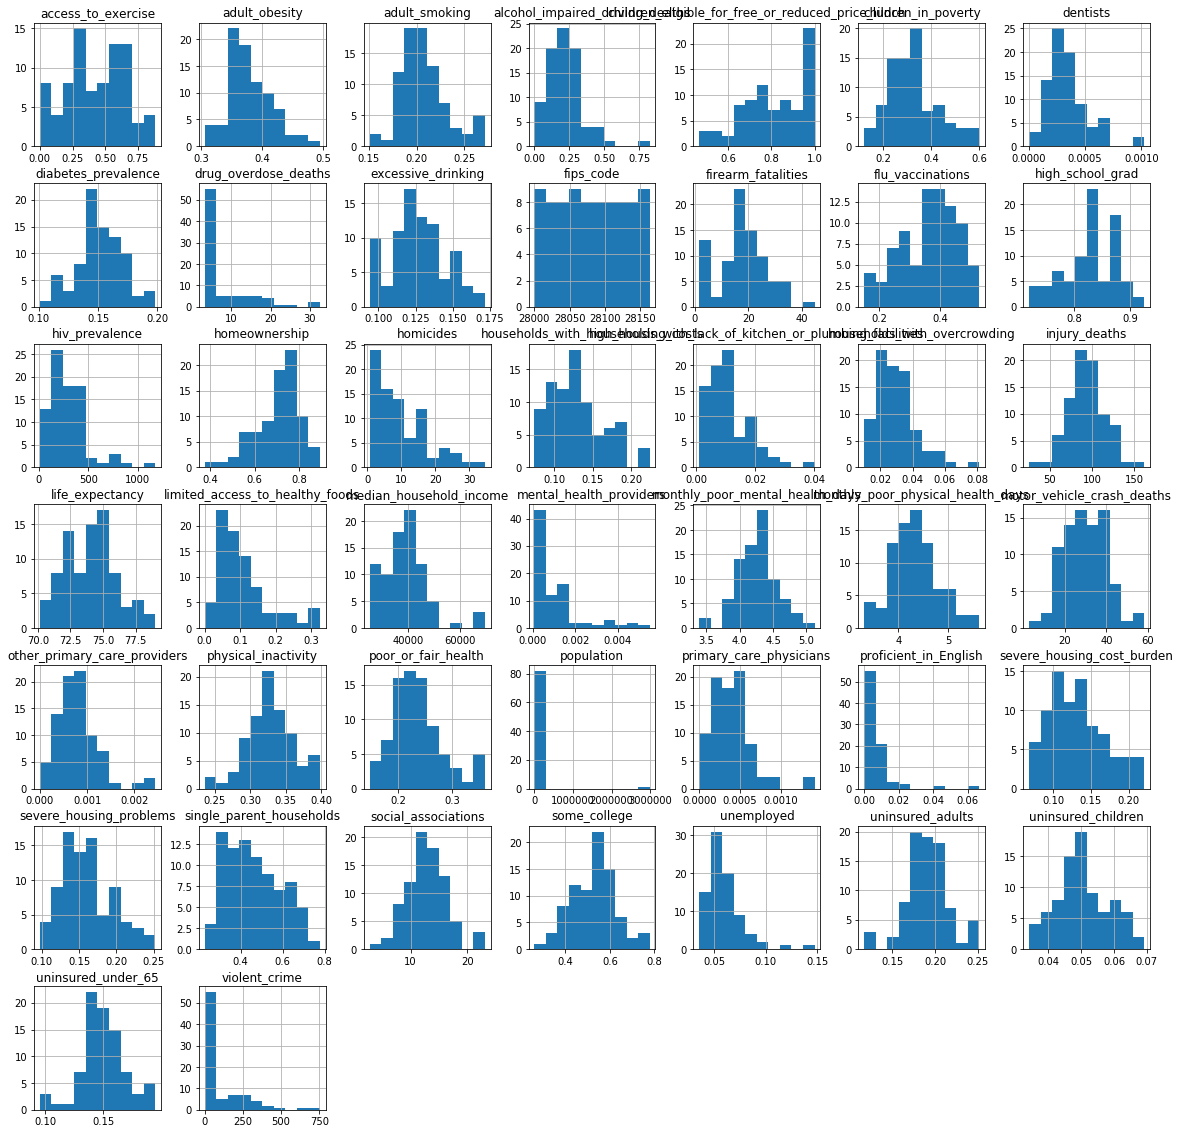

In [101]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax);

In [97]:
mlr_model = ols(formula='life_expectancy~poor_or_fair_health+monthly_poor_physical_health_days+monthly_poor_mental_health_days+adult_smoking+adult_obesity+physical_inactivity+access_to_exercise+excessive_drinking+alcohol_impaired_driving_deaths+uninsured_under_65+primary_care_physicians+dentists+mental_health_providers+flu_vaccinations+high_school_grad+some_college+unemployed+children_in_poverty+single_parent_households+social_associations+violent_crime+injury_deaths+severe_housing_problems+households_with_high_housing_costs+households_with_overcrowding+households_with_lack_of_kitchen_or_plumbing_facilities+diabetes_prevalence+hiv_prevalence+limited_access_to_healthy_foods+drug_overdose_deaths+motor_vehicle_crash_deaths+uninsured_adults+uninsured_children+other_primary_care_providers+median_household_income+children_eligible_for_free_or_reduced_price_lunch+homicides+firearm_fatalities+homeownership+severe_housing_cost_burden+population+proficient_in_English', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     4.517
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.45e-06
Time:                        07:45:58   Log-Likelihood:                -97.721
No. Observations:                  83   AIC:                             281.4
Df Residuals:                      40   BIC:                             385.5
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 74.4852     11.924      6.247      0.000      50.386      98.584
poor_or_fair_health                                       15.5588     20.982      0.742      0.463     -26.848      57.965
monthly_poor_physical_health_days                          0.2723      1.926      0.141      0.888      -3.620       4.164
monthly_poor_mental_health_days                           -1.5494      1.675     -0.925      0.361      -4.936       1.837
adult_smoking                                              1.9032     20.696      0.092      0.927     -39.925      43.732
adult_obesity                                             11.2360      8.535      1.316      0.196      -6.014      28.485
physical_inactivity                                       -2.7175      7.449     -0.365      0.717     -17.772      12.337
access_to_exercise                                        -1.0898      0.967     -1.128      0.266      -3.043       0.864
excessive_drinking                                        -9.9915     26.231     -0.381      0.705     -63.006      43.023
alcohol_impaired_driving_deaths                           -0.8672      1.481     -0.586      0.561      -3.860       2.125
uninsured_under_65                                       235.9883     72.927      3.236      0.002      88.597     383.380
primary_care_physicians                                  820.2584   1106.277      0.741      0.463   -1415.611    3056.128
dentists                                               -1282.0800   1811.421     -0.708      0.483   -4943.099    2378.939
mental_health_providers                                   87.5538    168.756      0.519      0.607    -253.514     428.622
flu_vaccinations                                          -5.6733      2.807     -2.021      0.050     -11.346      -0.001
high_school_grad                                           1.5526      4.135      0.375      0.709      -6.805       9.910
some_college                                               3.5994      3.049      1.180      0.245      -2.564       9.763
unemployed                                               -21.6357     19.736     -1.096      0.280     -61.524      18.253
children_in_poverty                                      -10.3482      6.736     -1.536      0.132     -23.963       3.266
single_parent_households                                  -1.8085      3.383     -0.535      0.596      -8.646       5.029
social_associations                                       -0.0316      0.064     -0.493      0.624      -0.161       0.098
violent_crime                                             -0.0005      0.001     -0.372      0.712      -0.003       0.002
injury_d

In [104]:
corr_health = df_health_features.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

,adult_smoking,adult_obesity,physical_inactivity,excessive_drinking,uninsured_under_65,primary_care_physicians,dentists,mental_health_providers,flu_vaccinations,unemployed,diabetes_prevalence,hiv_prevalence,limited_access_to_healthy_foods,uninsured_adults,uninsured_children,other_primary_care_providers,median_household_income
adult_smoking,1,0.65,0.38,-0.73,0.39,-0.2,-0.13,0.00081,-0.47,0.72,0.5,0.25,0.49,0.46,-0.17,-0.092,-0.73
adult_obesity,0.65,1,0.43,-0.7,0.38,-0.28,-0.11,-0.22,-0.42,0.6,0.58,0.32,0.31,0.49,-0.18,-0.16,-0.66
physical_inactivity,0.38,0.43,1,-0.52,0.37,-0.47,-0.37,-0.21,-0.18,0.32,0.63,-0.0084,0.03,0.42,0.075,-0.19,-0.54
excessive_drinking,-0.73,-0.7,-0.52,1,-0.38,0.22,0.18,0.054,0.45,-0.65,-0.71,-0.26,-0.38,-0.46,0.12,0.16,0.82
uninsured_under_65,0.39,0.38,0.37,-0.38,1,-0.52,-0.46,-0.25,-0.38,0.27,0.45,-0.18,0.074,0.97,0.67,-0.18,-0.55
primary_care_physicians,-0.2,-0.28,-0.47,0.22,-0.52,1,0.72,0.37,0.31,-0.24,-0.39,0.081,-0.03,-0.48,-0.39,0.33,0.42
dentists,-0.13,-0.11,-0.37,0.18,-0.46,0.72,1,0.38,0.22,-0.27,-0.33,0.29,-0.048,-0.39,-0.49,0.41,0.4
mental_health_providers,0.00081,-0.22,-0.21,0.054,-0.25,0.37,0.38,1,0.2,-0.082,-0.17,0.22,0.22,-0.24,-0.29,0.46,0.073
flu_vaccinations,-0.47,-0.42,-0.18,0.45,-0.38,0.31,0.22,0.2,1,-0.53,-0.33,-0.13,-0.16,-0.42,-0.19,0.18,0.46
unemployed,0.72,0.6,0.32,-0.65,0.27,-0.24,-0.27,-0.082,-0.53,1,0.46,0.23,0.38,0.29,-0.1,-0.2,-0.63


In [105]:
corr_social = df_social_features.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

,adult_smoking,adult_obesity,physical_inactivity,excessive_drinking,uninsured_under_65,primary_care_physicians,dentists,mental_health_providers,flu_vaccinations,unemployed,diabetes_prevalence,hiv_prevalence,limited_access_to_healthy_foods,uninsured_adults,uninsured_children,other_primary_care_providers,median_household_income
adult_smoking,1,0.65,0.38,-0.73,0.39,-0.2,-0.13,0.00081,-0.47,0.72,0.5,0.25,0.49,0.46,-0.17,-0.092,-0.73
adult_obesity,0.65,1,0.43,-0.7,0.38,-0.28,-0.11,-0.22,-0.42,0.6,0.58,0.32,0.31,0.49,-0.18,-0.16,-0.66
physical_inactivity,0.38,0.43,1,-0.52,0.37,-0.47,-0.37,-0.21,-0.18,0.32,0.63,-0.0084,0.03,0.42,0.075,-0.19,-0.54
excessive_drinking,-0.73,-0.7,-0.52,1,-0.38,0.22,0.18,0.054,0.45,-0.65,-0.71,-0.26,-0.38,-0.46,0.12,0.16,0.82
uninsured_under_65,0.39,0.38,0.37,-0.38,1,-0.52,-0.46,-0.25,-0.38,0.27,0.45,-0.18,0.074,0.97,0.67,-0.18,-0.55
primary_care_physicians,-0.2,-0.28,-0.47,0.22,-0.52,1,0.72,0.37,0.31,-0.24,-0.39,0.081,-0.03,-0.48,-0.39,0.33,0.42
dentists,-0.13,-0.11,-0.37,0.18,-0.46,0.72,1,0.38,0.22,-0.27,-0.33,0.29,-0.048,-0.39,-0.49,0.41,0.4
mental_health_providers,0.00081,-0.22,-0.21,0.054,-0.25,0.37,0.38,1,0.2,-0.082,-0.17,0.22,0.22,-0.24,-0.29,0.46,0.073
flu_vaccinations,-0.47,-0.42,-0.18,0.45,-0.38,0.31,0.22,0.2,1,-0.53,-0.33,-0.13,-0.16,-0.42,-0.19,0.18,0.46
unemployed,0.72,0.6,0.32,-0.65,0.27,-0.24,-0.27,-0.082,-0.53,1,0.46,0.23,0.38,0.29,-0.1,-0.2,-0.63


In [106]:
mlr_model_2 = ols(formula='life_expectancy~adult_smoking+adult_obesity+physical_inactivity+excessive_drinking+primary_care_physicians+dentists+mental_health_providers+flu_vaccinations+unemployed+diabetes_prevalence+hiv_prevalence+limited_access_to_healthy_foods+uninsured_adults+uninsured_children+other_primary_care_providers+median_household_income', data=df).fit()
mlr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     4.450
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           7.52e-06
Time:                        07:52:37   Log-Likelihood:                -139.89
No. Observations:                  83   AIC:                             313.8
Df Residuals:                      66   BIC:                             354.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          65.5916      6.693      9.799      0.000      52.228      78.956
adult_smoking                       2.1326     13.296      0.160      0.873     -24.413      28.678
adult_obesity                       2.8570      8.551      0.334      0.739     -14.217      19.931
physical_inactivity               -12.0876      7.288     -1.659      0.102     -26.638       2.463
excessive_drinking                 15.1211     19.639      0.770      0.444     -24.089      54.331
primary_care_physicians          -807.4798   1077.045     -0.750      0.456   -2957.870    1342.910
dentists                         1215.3468   1654.938      0.734      0.465   -2088.843    4519.537
mental_health_providers           218.5882    175.266      1.247      0.217    -131.342     568.518
flu_vaccinations                    1.4128      2.332      0.606      0.547      -3.243       6.069
unemployed                          8.1508     15.584      0.523      0.603     -22.964      39.266
diabetes_prevalence                 5.8458     14.806      0.395      0.694     -23.714      35.406
hiv_prevalence                     -0.0013      0.001     -1.186      0.240      -0.004       0.001
limited_access_to_healthy_foods     3.9029      2.866      1.362      0.178      -1.819       9.625
uninsured_adults                   -2.7962     14.330     -0.195      0.846     -31.406      25.814
uninsured_children                 72.8385     41.162      1.770      0.081      -9.344     155.021
other_primary_care_providers     -522.8604    521.395     -1.003      0.320   -1563.858     518.138
median_household_income             0.0001   4.45e-05      2.363      0.021    1.63e-05       0.000
==============================================================================
Omnibus:                        1.036   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.626
Skew:                          -0.198   Prob(JB):                        0.731
Kurtosis:                       3.158   Cond. No.                     4.40e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

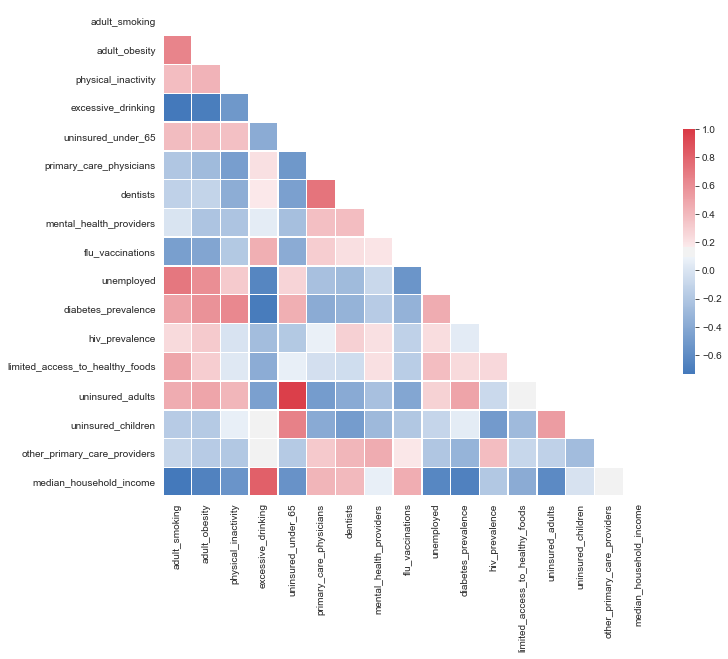

In [107]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr_health, dropDuplicates = True)

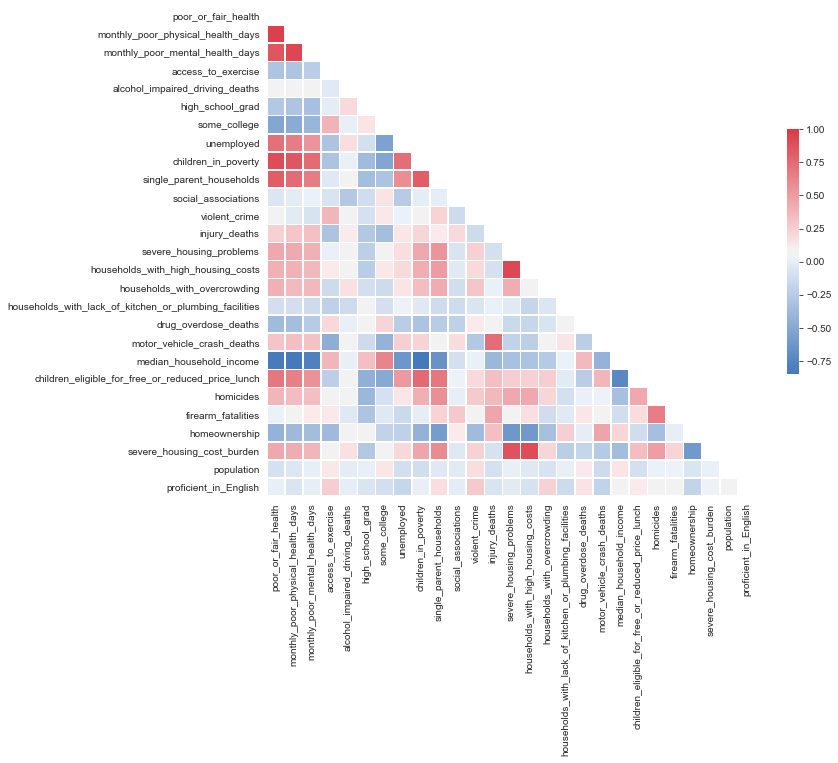

In [108]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr_social, dropDuplicates = True)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(df_health_features, target, random_state=25,test_size=0.2)

In [112]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_health_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_health_features.columns)

In [113]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 1.0865347265364171


In [114]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 1.1595110130914483
Training:  1 vs. Testing:  1


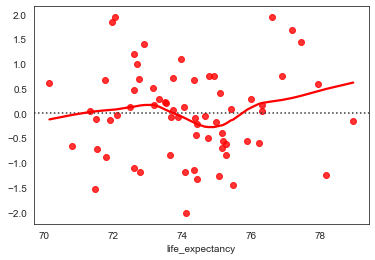

In [115]:
sns.residplot( y_train, y_train_pred,lowess=True, color="r")

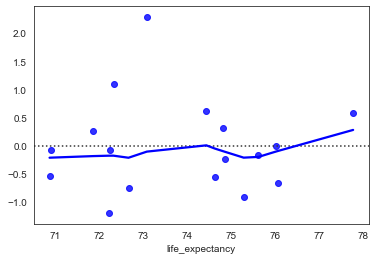

In [116]:
sns.residplot( y_test, y_pred, lowess=True, color="b")

In [117]:
y_log = np.sqrt(y_train)

In [118]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

y_train_pred = lm_log.predict(X_train)

#exponentiate the predictions to get them on the same original scale 
y_train_pred = np.square(y_train_pred)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 1.0862495100295781


In [119]:
y_test_pred = lm_log.predict(X_test)


#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.square(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 1.1572966653109409
Training:  1 vs. Testing:  1


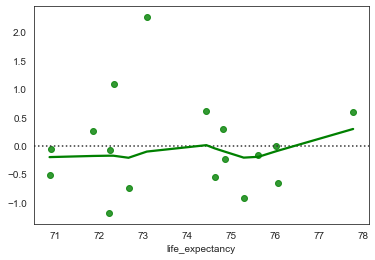

In [120]:
sns.residplot( y_test, y_test_pred, lowess=True, color="g")

In [121]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_health_features)
poly2_columns = poly_2.get_feature_names(df_health_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,adult_smoking,adult_obesity,physical_inactivity,excessive_drinking,uninsured_under_65,primary_care_physicians,dentists,mental_health_providers,flu_vaccinations,unemployed,diabetes_prevalence,hiv_prevalence,limited_access_to_healthy_foods,uninsured_adults,uninsured_children,other_primary_care_providers,median_household_income,adult_smoking^2,adult_smoking adult_obesity,adult_smoking physical_inactivity,adult_smoking excessive_drinking,adult_smoking uninsured_under_65,adult_smoking primary_care_physicians,adult_smoking dentists,adult_smoking mental_health_providers,adult_smoking flu_vaccinations,adult_smoking unemployed,adult_smoking diabetes_prevalence,adult_smoking hiv_prevalence,adult_smoking limited_access_to_healthy_foods,adult_smoking uninsured_adults,adult_smoking uninsured_children,adult_smoking other_primary_care_providers,adult_smoking median_household_income,adult_obesity^2,adult_obesity physical_inactivity,adult_obesity excessive_drinking,adult_obesity uninsured_under_65,adult_obesity primary_care_physicians,adult_obesity dentists,adult_obesity mental_health_providers,adult_obesity flu_vaccinations,adult_obesity unemployed,adult_obesity diabetes_prevalence,adult_obesity hiv_prevalence,adult_obesity limited_access_to_healthy_foods,adult_obesity uninsured_adults,adult_obesity uninsured_children,adult_obesity other_primary_care_providers,adult_obesity median_household_income,physical_inactivity^2,physical_inactivity excessive_drinking,physical_inactivity uninsured_under_65,physical_inactivity primary_care_physicians,physical_inactivity dentists,physical_inactivity mental_health_providers,physical_inactivity flu_vaccinations,physical_inactivity unemployed,physical_inactivity diabetes_prevalence,physical_inactivity hiv_prevalence,physical_inactivity limited_access_to_healthy_foods,physical_inactivity uninsured_adults,physical_inactivity uninsured_children,physical_inactivity other_primary_care_providers,physical_inactivity median_household_income,excessive_drinking^2,excessive_drinking uninsured_under_65,excessive_drinking primary_care_physicians,excessive_drinking dentists,excessive_drinking mental_health_providers,excessive_drinking flu_vaccinations,excessive_drinking unemployed,excessive_drinking diabetes_prevalence,excessive_drinking hiv_prevalence,excessive_drinking limited_access_to_healthy_foods,excessive_drinking uninsured_adults,excessive_drinking uninsured_children,excessive_drinking other_primary_care_providers,excessive_drinking median_household_income,uninsured_under_65^2,uninsured_under_65 primary_care_physicians,uninsured_under_65 dentists,uninsured_under_65 mental_health_providers,uninsured_under_65 flu_vaccinations,uninsured_under_65 unemployed,uninsured_under_65 diabetes_prevalence,uninsured_under_65 hiv_prevalence,uninsured_under_65 limited_access_to_healthy_foods,uninsured_under_65 uninsured_adults,uninsured_under_65 uninsured_children,uninsured_under_65 other_primary_care_providers,uninsured_under_65 median_household_income,primary_care_physicians^2,primary_care_physicians dentists,primary_care_physicians mental_health_providers,primary_care_physicians flu_vaccinations,primary_care_physicians unemployed,primary_care_physicians diabetes_prevalence,primary_care_physicians hiv_prevalence,primary_care_physicians limited_access_to_healthy_foods,primary_care_physicians uninsured_adults,primary_care_physicians uninsured_children,primary_care_physicians other_primary_care_providers,primary_care_physicians median_household_income,dentists^2,dentists mental_health_providers,dentists flu_vaccinations,dentists unemployed,dentists diabetes_prevalence,dentists hiv_prevalence,dentists limited_access_to_healthy_foods,dentists uninsured_adults,dentists uninsured_children,dentists other_primary_care_providers,dentists median_household_income,mental_health_providers^2,mental_health_providers flu_vaccinations,mental_health_providers unemployed,mental_health_providers diabetes_prevalence,mental_health_providers hiv_preva

In [122]:
df_poly2.shape

(83, 170)

In [123]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_poly2, target, random_state=25,test_size=0.2)

In [124]:
scaler2 = StandardScaler()
scaled = scaler2.fit(X_train2)

X_train2 = pd.DataFrame(data=scaler2.transform(X_train2), columns=df_poly2.columns)

X_test2 = pd.DataFrame(data=scaler2.transform(X_test2), columns=df_poly2.columns)

In [125]:
X_test2.head()

,adult_smoking,adult_obesity,physical_inactivity,excessive_drinking,uninsured_under_65,primary_care_physicians,dentists,mental_health_providers,flu_vaccinations,unemployed,diabetes_prevalence,hiv_prevalence,limited_access_to_healthy_foods,uninsured_adults,uninsured_children,other_primary_care_providers,median_household_income,adult_smoking^2,adult_smoking adult_obesity,adult_smoking physical_inactivity,adult_smoking excessive_drinking,adult_smoking uninsured_under_65,adult_smoking primary_care_physicians,adult_smoking dentists,adult_smoking mental_health_providers,adult_smoking flu_vaccinations,adult_smoking unemployed,adult_smoking diabetes_prevalence,adult_smoking hiv_prevalence,adult_smoking limited_access_to_healthy_foods,adult_smoking uninsured_adults,adult_smoking uninsured_children,adult_smoking other_primary_care_providers,adult_smoking median_household_income,adult_obesity^2,adult_obesity physical_inactivity,adult_obesity excessive_drinking,adult_obesity uninsured_under_65,adult_obesity primary_care_physicians,adult_obesity dentists,adult_obesity mental_health_providers,adult_obesity flu_vaccinations,adult_obesity unemployed,adult_obesity diabetes_prevalence,adult_obesity hiv_prevalence,adult_obesity limited_access_to_healthy_foods,adult_obesity uninsured_adults,adult_obesity uninsured_children,adult_obesity other_primary_care_providers,adult_obesity median_household_income,physical_inactivity^2,physical_inactivity excessive_drinking,physical_inactivity uninsured_under_65,physical_inactivity primary_care_physicians,physical_inactivity dentists,physical_inactivity mental_health_providers,physical_inactivity flu_vaccinations,physical_inactivity unemployed,physical_inactivity diabetes_prevalence,physical_inactivity hiv_prevalence,physical_inactivity limited_access_to_healthy_foods,physical_inactivity uninsured_adults,physical_inactivity uninsured_children,physical_inactivity other_primary_care_providers,physical_inactivity median_household_income,excessive_drinking^2,excessive_drinking uninsured_under_65,excessive_drinking primary_care_physicians,excessive_drinking dentists,excessive_drinking mental_health_providers,excessive_drinking flu_vaccinations,excessive_drinking unemployed,excessive_drinking diabetes_prevalence,excessive_drinking hiv_prevalence,excessive_drinking limited_access_to_healthy_foods,excessive_drinking uninsured_adults,excessive_drinking uninsured_children,excessive_drinking other_primary_care_providers,excessive_drinking median_household_income,uninsured_under_65^2,uninsured_under_65 primary_care_physicians,uninsured_under_65 dentists,uninsured_under_65 mental_health_providers,uninsured_under_65 flu_vaccinations,uninsured_under_65 unemployed,uninsured_under_65 diabetes_prevalence,uninsured_under_65 hiv_prevalence,uninsured_under_65 limited_access_to_healthy_foods,uninsured_under_65 uninsured_adults,uninsured_under_65 uninsured_children,uninsured_under_65 other_primary_care_providers,uninsured_under_65 median_household_income,primary_care_physicians^2,primary_care_physicians dentists,primary_care_physicians mental_health_providers,primary_care_physicians flu_vaccinations,primary_care_physicians unemployed,primary_care_physicians diabetes_prevalence,primary_care_physicians hiv_prevalence,primary_care_physicians limited_access_to_healthy_foods,primary_care_physicians uninsured_adults,primary_care_physicians uninsured_children,primary_care_physicians other_primary_care_providers,primary_care_physicians median_household_income,dentists^2,dentists mental_health_providers,dentists flu_vaccinations,dentists unemployed,dentists diabetes_prevalence,dentists hiv_prevalence,dentists limited_access_to_healthy_foods,dentists uninsured_adults,dentists uninsured_children,dentists other_primary_care_providers,dentists median_household_income,mental_health_providers^2,mental_health_providers flu_vaccinations,mental_health_providers unemployed,mental_health_providers diabetes_prevalence,mental_health_providers hiv_preva

In [126]:
lm_2 = LinearRegression()

lm_2 = lm_2.fit(X_train2, y_train2)

y_train_pred2 = lm_2.predict(X_train2)

train2_rmse = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))

print('Training Root Mean Squared Error:' , train2_rmse)

Training Root Mean Squared Error: 2.4737922779493408e-14


In [127]:
y_pred2 = lm_2.predict(X_test2)

test2_rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))

print('Testing Root Mean Squared Error:' , test2_rmse)

Testing Root Mean Squared Error: 1.9080889957538718


In [128]:
print('Training: ', int(train2_rmse), "vs. Testing: ", int(test2_rmse))

Training:  0 vs. Testing:  1


In [129]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,adult_smoking,adult_obesity,physical_inactivity,excessive_drinking,uninsured_under_65,primary_care_physicians,dentists,mental_health_providers,flu_vaccinations,unemployed,diabetes_prevalence,hiv_prevalence,limited_access_to_healthy_foods,uninsured_adults,uninsured_children,other_primary_care_providers,median_household_income
adult_smoking,NaN,0.673136,0.352585,0.739625,0.401328,0.153999,0.102700,0.000250,0.510936,0.724442,0.517273,0.311058,0.478449,0.475138,0.166294,0.072670,0.741837
adult_obesity,NaN,NaN,0.418700,0.739939,0.411217,0.277568,0.130651,0.259157,0.484245,0.636784,0.608462,0.381307,0.324803,0.528262,0.180007,0.178504,0.715195
physical_inactivity,NaN,NaN,NaN,0.521405,0.409043,0.475001,0.426479,0.247454,0.170484,0.270385,0.636908,0.028415,0.038420,0.437785,0.142830,0.214471,0.586642
excessive_drinking,NaN,NaN,NaN,NaN,0.405195,0.198676,0.172009,0.093599,0.446557,0.631094,0.716386,0.264476,0.346137,0.477645,0.106173,0.155877,0.829875
uninsured_under_65,NaN,NaN,NaN,NaN,NaN,0.490489,0.438540,0.248654,0.393359,0.271676,0.483599,0.131363,0.010133,0.972886,0.664447,0.151614,0.579787
primary_care_physicians,NaN,NaN,NaN,NaN,NaN,NaN,0.743978,0.385293,0.298038,0.197719,0.384073,0.000170,0.016091,0.452838,0.383340,0.285223,0.389605
dentists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300522,0.220439,0.241531,0.352381,0.122598,0.023950,0.368839,0.452160,0.301762,0.390057
mental_health_providers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214342,0.073235,0.239717,0.163865,0.259431,0.246128,0.249415,0.511248,0.059103
flu_vaccinations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.542422,0.353403,0.177187,0.193637,0.427741,0.173324,0.187390,0.462865
unemployed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.447098,0.293712,0.362677,0.287420,0.100151,0.160911,0.614938


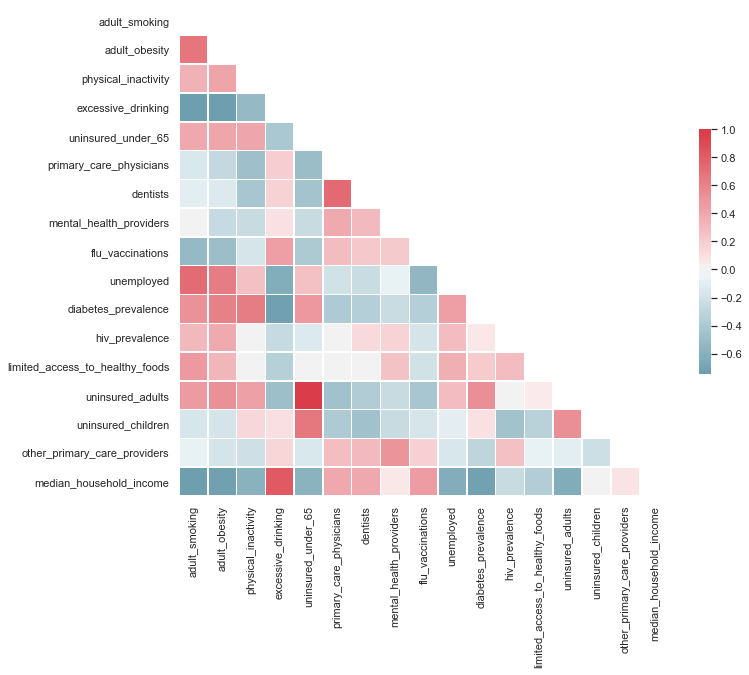

In [130]:
sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [131]:
len(X_train.columns)

17

In [132]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train.drop(columns=to_drop, inplace=False)
X_test.drop(columns=to_drop, inplace=False)

,adult_smoking,adult_obesity,physical_inactivity,excessive_drinking,uninsured_under_65,primary_care_physicians,dentists,mental_health_providers,flu_vaccinations,unemployed,diabetes_prevalence,hiv_prevalence,limited_access_to_healthy_foods,uninsured_children,other_primary_care_providers,median_household_income
0,0.530695,-0.753940,0.223850,-0.783713,-0.207188,-0.116308,1.264953,2.317867,-0.365548,0.015911,0.316245,0.925293,-0.176053,-0.597911,1.011982,-0.740788
1,-0.212692,-0.222883,-0.493037,-0.937009,0.377328,0.352843,-1.069037,0.648601,0.692617,0.424981,0.847343,-0.070844,0.692864,-0.019996,-0.770797,-0.354487
2,-0.032461,-0.435306,-1.365768,-0.467156,0.503580,-0.197443,-0.569610,-0.413739,-0.153915,-0.219963,-0.002414,-0.093004,1.077791,0.316586,-0.451917,-1.131369
3,0.869928,-0.408753,-0.524206,0.437591,-0.495216,0.441988,0.746227,0.388537,0.269351,-0.461550,-0.533512,0.484735,0.061637,-0.426451,0.498051,0.474429
4,-0.803997,-0.647729,-1.241092,0.916868,0.870980,0.318222,0.069740,-0.730641,0.269351,-1.246190,-1.861257,-0.783653,-0.533032,1.528704,1.215025,0.845909
5,0.256126,-0.169777,1.626454,0.051868,-0.128087,-0.653996,-0.423034,-0.395580,1.010067,0.432628,0.528684,-0.086673,0.179339,-0.585454,-0.206876,-0.367331
6,1.075490,0.069198,0.535540,-0.998651,0.164020,-0.702905,-0.639803,-0.627066,-2.058612,1.461963,-0.161743,0.232007,-0.273260,0.165334,-0.521167,-1.241694
7,0.977227,0.308174,-0.306023,-1.098729,-0.438424,0.410770,0.397118,-0.368373,0.057718,0.268198,0.050696,0.875170,1.938087,-0.074634,0.323697,-0.555157
8,0.974156,0.016093,0.068005,-0.956382,2.131544,-1.151093,-0.782853,0.466701,-1.212080,1.043124,2.015758,-0.499796,2.763878,0.943967,-1.122902,-0.795566
9,-0.246389,-0.727388,-2.643696,1.297028,-0.361268,0.120177,0.134707,0.627991,1.327516,-0.586380,-2.020586,-0.534091,0.713774,0.103235,-0.214118,0.012493


In [133]:
to_drop

['uninsured_adults']

In [134]:
#Measure of the colinearity among predictor variables within the multiple regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

[4.445808400688181,
 5.3290775093168,
 2.2614631809310946,
 5.137938173527606,
 79.86508601370011,
 3.151014180020215,
 3.337601836334743,
 1.9987224932788974,
 2.052038719480654,
 3.9197766352151215,
 3.108041507103917,
 1.885803928890591,
 1.825437099881702,
 66.60657162850089,
 7.13379949687176,
 1.8518982388562861,
 7.61855120224561]

In [135]:
#Measure of the colinearity among predictor variables within the multiple regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

[4.445808400688181,
 5.3290775093168,
 2.2614631809310946,
 5.137938173527606,
 79.86508601370011,
 3.151014180020215,
 3.337601836334743,
 1.9987224932788974,
 2.052038719480654,
 3.9197766352151215,
 3.108041507103917,
 1.885803928890591,
 1.825437099881702,
 66.60657162850089,
 7.13379949687176,
 1.8518982388562861,
 7.61855120224561]

In [137]:
df_health_features.corrwith(target).abs()

adult_smoking                      0.433455
adult_obesity                      0.451554
physical_inactivity                0.447442
excessive_drinking                 0.549621
uninsured_under_65                 0.106498
primary_care_physicians            0.161208
dentists                           0.117744
mental_health_providers            0.081624
flu_vaccinations                   0.243868
unemployed                         0.354333
diabetes_prevalence                0.391140
hiv_prevalence                     0.334391
limited_access_to_healthy_foods    0.120908
uninsured_adults                   0.239026
uninsured_children                 0.255867
other_primary_care_providers       0.096865
median_household_income            0.581632
dtype: float64

In [138]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_health_features, target, random_state=25,test_size=0.2)
selector = SelectKBest(f_regression, k=15)
selector.fit(X_train3, y_train3)

SelectKBest(k=15, score_func=<function f_regression at 0x7f7ee14cea70>)

In [139]:
selected_columns = X_train3.columns[selector.get_support()]
removed_columns = X_train3.columns[~selector.get_support()]
# X_train = X_train3[selected_columns]
# X_test = X_test3[selected_columns]

In [140]:
list(removed_columns)

['dentists', 'mental_health_providers']

In [141]:
list(selected_columns)

['adult_smoking',
 'adult_obesity',
 'physical_inactivity',
 'excessive_drinking',
 'uninsured_under_65',
 'primary_care_physicians',
 'flu_vaccinations',
 'unemployed',
 'diabetes_prevalence',
 'hiv_prevalence',
 'limited_access_to_healthy_foods',
 'uninsured_adults',
 'uninsured_children',
 'other_primary_care_providers',
 'median_household_income']

In [142]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train3[selected_columns], y_train3)

y_train_kbest = lm_kbest.predict(X_train3[selected_columns])

train3_rmse = np.sqrt(metrics.mean_squared_error(y_train3, y_train_kbest))

print('Training Root Mean Squared Error:' , train3_rmse)

y_kbest = lm_kbest.predict(X_test3[selected_columns])

test3_rmse = np.sqrt(metrics.mean_squared_error(y_test3, y_kbest))

print('Testing Root Mean Squared Error:' , test3_rmse)

Training Root Mean Squared Error: 1.1037371516857302
Testing Root Mean Squared Error: 1.1618283231281563


In [143]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(df_poly2, target, random_state=25,test_size=0.2)

In [144]:
from sklearn.feature_selection import RFECV

lm4 = linear_model.LinearRegression()

In [145]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=lm4, step=1, cv=10, scoring='neg_mean_squared_error')

In [146]:
# Fit recursive feature eliminator 
selector.fit(X_train4, y_train4)

RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [147]:
selected_rfe = X_train4.columns[selector.support_]
removed_rfe = X_train4.columns[~selector.support_]

In [148]:
list(removed_rfe)

['adult_smoking',
 'adult_obesity',
 'physical_inactivity',
 'excessive_drinking',
 'uninsured_under_65',
 'primary_care_physicians',
 'dentists',
 'mental_health_providers',
 'flu_vaccinations',
 'unemployed',
 'diabetes_prevalence',
 'hiv_prevalence',
 'limited_access_to_healthy_foods',
 'uninsured_adults',
 'uninsured_children',
 'other_primary_care_providers',
 'median_household_income',
 'adult_smoking^2',
 'adult_smoking adult_obesity',
 'adult_smoking physical_inactivity',
 'adult_smoking excessive_drinking',
 'adult_smoking uninsured_under_65',
 'adult_smoking dentists',
 'adult_smoking mental_health_providers',
 'adult_smoking flu_vaccinations',
 'adult_smoking unemployed',
 'adult_smoking diabetes_prevalence',
 'adult_smoking hiv_prevalence',
 'adult_smoking limited_access_to_healthy_foods',
 'adult_smoking uninsured_adults',
 'adult_smoking uninsured_children',
 'adult_smoking other_primary_care_providers',
 'adult_smoking median_household_income',
 'adult_obesity^2',
 'adul

In [149]:
list(selected_rfe)

['adult_smoking primary_care_physicians',
 'physical_inactivity dentists',
 'physical_inactivity other_primary_care_providers',
 'excessive_drinking primary_care_physicians',
 'excessive_drinking other_primary_care_providers',
 'uninsured_under_65 dentists',
 'uninsured_under_65 other_primary_care_providers',
 'primary_care_physicians unemployed',
 'dentists diabetes_prevalence',
 'dentists uninsured_adults',
 'diabetes_prevalence other_primary_care_providers',
 'uninsured_adults other_primary_care_providers']

In [150]:
#instantiate a linear regression object
lm4_rfe = LinearRegression()

#fit the linear regression to the data
lm4_rfe = lm4_rfe.fit(X_train4[selected_rfe], y_train4)

y_rfe = lm4_rfe.predict(X_train4[selected_rfe])

train4_rmse = np.sqrt(metrics.mean_squared_error(y_train4, y_rfe))

print('Training Root Mean Squared Error:' , train4_rmse)

y_pred_rfe = lm4_rfe.predict(X_test4[selected_rfe])

test4_rmse = np.sqrt(metrics.mean_squared_error(y_test4, y_pred_rfe))

print('Testing Root Mean Squared Error:' , test4_rmse)

Training Root Mean Squared Error: 1.1061709661620298
Testing Root Mean Squared Error: 1.7850496299413194


In [151]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(df_poly2, target, random_state=25,test_size=0.2)

In [152]:
lm5_rfe = LinearRegression()
selected_rfe2 = X_train5.columns[selector.support_]
lm5_rfe = lm5_rfe.fit(X_train5[selected_rfe2], y_train5)

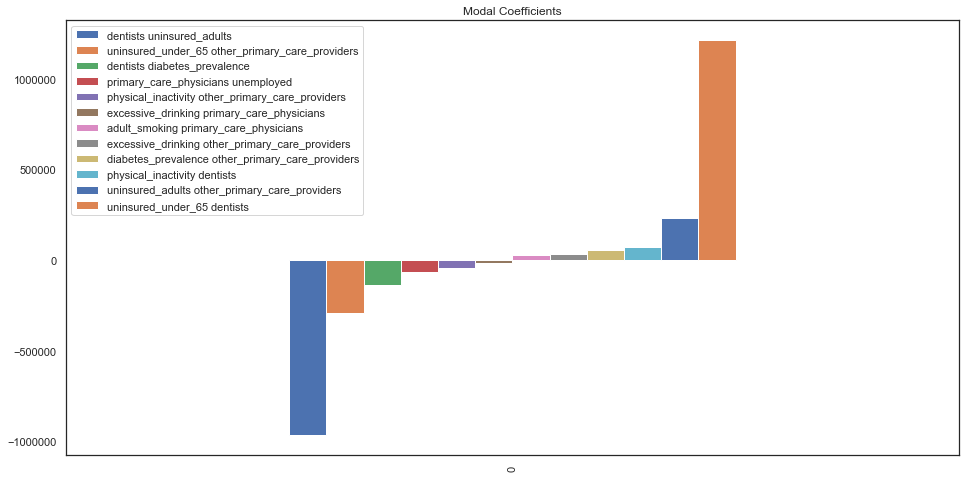

In [163]:
coef = pd.DataFrame(data=lm5_rfe.coef_ ).T
coef.columns = selected_rfe2

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(16,8),)

In [154]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train5,y_train5)

y_train_pred5 = lasso.predict(X_train5)
y_pred5 = lasso.predict(X_test5)

train5_rmse = metrics.mean_absolute_error(y_train5, y_train_pred5)
test5_rmse = np.sqrt(metrics.mean_squared_error(y_test5, y_pred5))
print('Training Error: '+ str(train5_rmse) )
print('Testing Error: '+ str(test5_rmse) )

Training Error: 0.7744669440373447
Testing Error: 1.5568953277512967


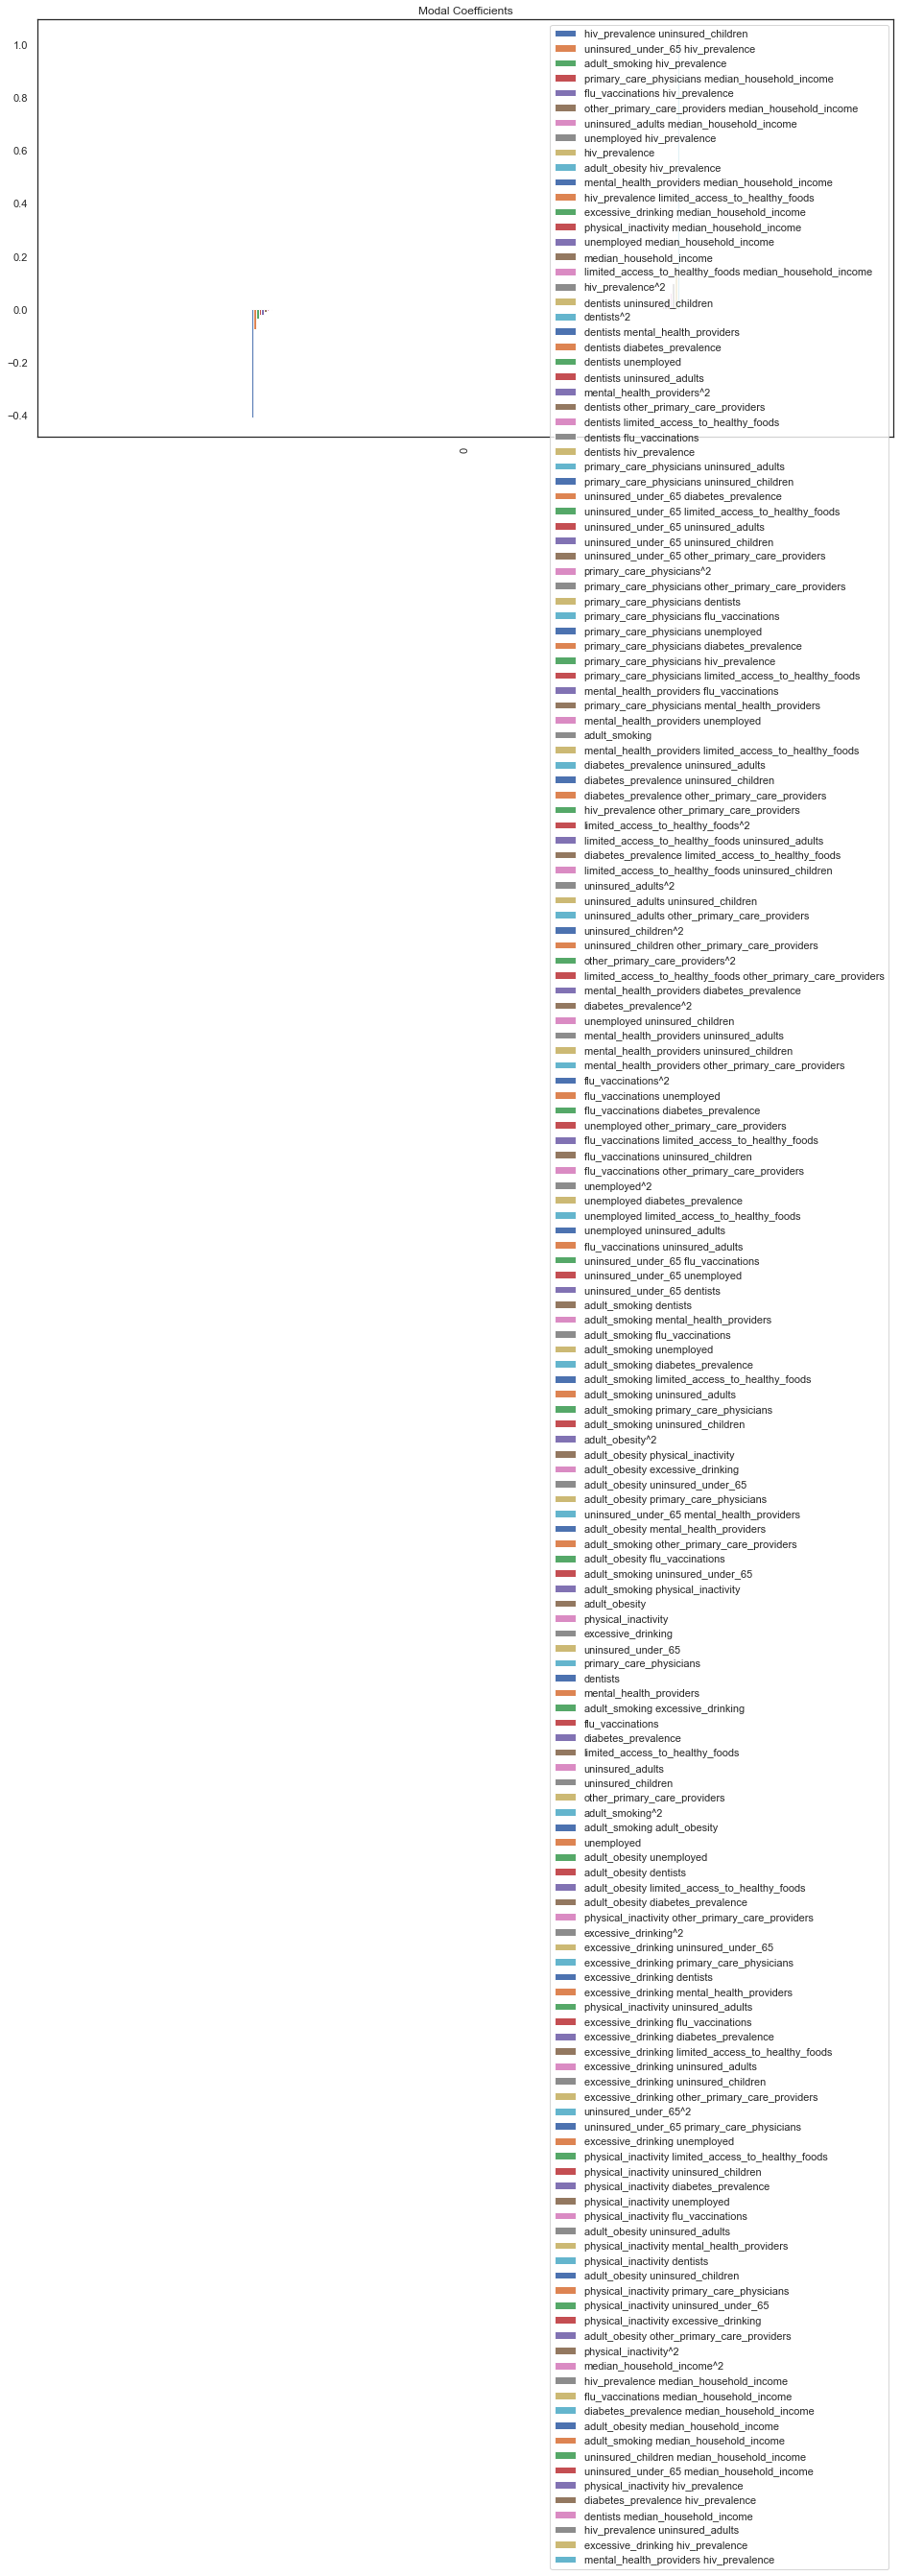

In [164]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train5.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(16,8))

In [156]:
## training the model
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(X_train5,y_train5)

y_train_lasso1 = lasso1.predict(X_train5)
y_pred_lasso1 = lasso1.predict(X_test5)

train5_rmse_lasso1 = metrics.mean_absolute_error(y_train5, y_train_lasso1)
test5_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test5, y_pred_lasso1))
print('Training Error: '+ str(train5_rmse_lasso1) )
print('Testing Error: '+ str(test5_rmse_lasso1) )

Training Error: 0.837955076053498
Testing Error: 1.5147285969208064


# Results

In [157]:
# Test Results
print('#1 Original Training Error: ', train_rmse, '#1 Original Testing Error: ', test_rmse)
print('#2 Poly Training Error: ', train2_rmse, '#2 Poly Testing Error: ', test2_rmse)
print('#3 F-Test Training Error: ', train3_rmse, '#3 F-Test Testing Error: ', test3_rmse)
print('#4 Recursive Training Error: ', train4_rmse, '#4 Recursive Testing Error: ', test4_rmse)
print('#5 Lasso Training Error: ', train5_rmse_lasso1, '#5 Lasso Testing Error: ', test5_rmse_lasso1)

#1 Original Training Error:  1.0862495100295781 #1 Original Testing Error:  1.1572966653109409
#2 Poly Training Error:  2.4737922779493408e-14 #2 Poly Testing Error:  1.9080889957538718
#3 F-Test Training Error:  1.1037371516857302 #3 F-Test Testing Error:  1.1618283231281563
#4 Recursive Training Error:  1.1061709661620298 #4 Recursive Testing Error:  1.7850496299413194
#5 Lasso Training Error:  0.837955076053498 #5 Lasso Testing Error:  1.5147285969208064


In [166]:
#Standardized RMSE to see error relative to the data 
print('Root Mean Squared Error Z-score:' , test3_rmse/target.std())

Root Mean Squared Error Z-score: 0.6135569413360117
